## DTMF Project Part 4: Decoding of entire phone numbers

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import statistics
from statistics import stdev
from collections import Counter
from scipy.io import wavfile

### Objective
In this part of the project you need to decide entire phone numbers that were encoded in form of a DTMF sound file. Each phone number consists of 10 digits separated by short moments of silence. In addition, the sounds are corrupted by a slight amount of noise.

There are 100 sound files in total each encoding a 10 digit phone number. The wav-files are compressed in the zip-file **`All_Numbers.zip`**. Your task is to determine the 100 numbers. 

Remember: You need to provide references for all sources that you use.

### Fast Fourier Transform (FFT)

Ideally, you use the method you developed and tested in Part 3 of the project. However, here is an alternative. Basically, for each digit, we want to know what frequencies are present in the two sinusoids. Once we know the frequency, we can easily determine the digit using a simple conditional statement.

Let's assume we have a signal $y(t)$ that is one second long and contains the frequencies $f_1 = 100$ Hz and $f_2 = 300$ Hz.

$$y(t)=A_1 \cos(2\pi f_1 t+\phi_1)+A_2 \cos(2\pi f_2 t+\phi_2)$$


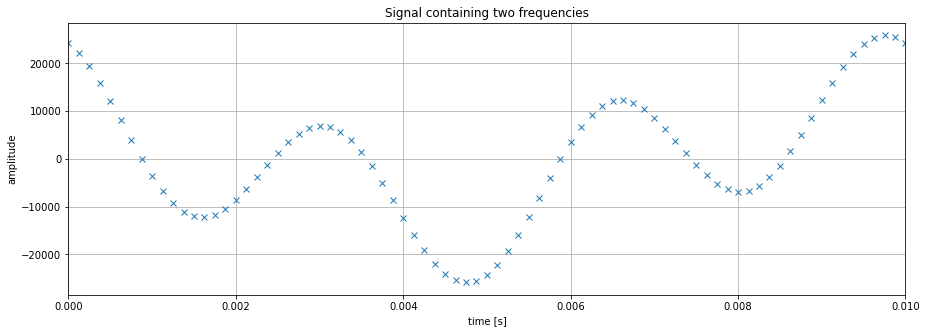

In [2]:
A1 = 0.35 # amplitude
f1 = 100 # frequency of tone A
phi1 = np.pi/2 # phase shift

A2 = 0.45 # amplitude
f2 = 300 # frequency of tone A
phi1 = np.pi/8 # phase shift

fs=8000;
B=16;

t=np.arange(0,1,1/fs) # discretized time (1 second duration)
y=A1*np.cos(2*np.pi*f1*t+phi1) + A2*np.cos(2*np.pi*f2*t+phi1) # discretized signal y(t)

yq = (2**(B-1))*y 
yq = yq.astype(np.int16) # convert to integer 16-bit format

# Create graph
figure1=plt.figure(figsize = (15,5))
plt.plot(t, yq, marker = 'x', linestyle = '')
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Signal containing two frequencies")
plt.grid()
plt.xlim([0,0.01])
plt.show()

In [3]:
# Store as wav-file
wavfile.write("my_sound.wav", fs, yq)

# read signal from wav-file
sampling_rate, data = wavfile.read("my_sound.wav")
data=np.array(data) # convert to numpy array

In [4]:
# calculate fft of signal
Yfreq = np.fft.fft(data)
frequencies = np.arange(0,np.shape(data)[0])/np.shape(data)[0]*sampling_rate

# calculate the amplitude distribution as a function of frequency
Yfreq_abs = abs(Yfreq)

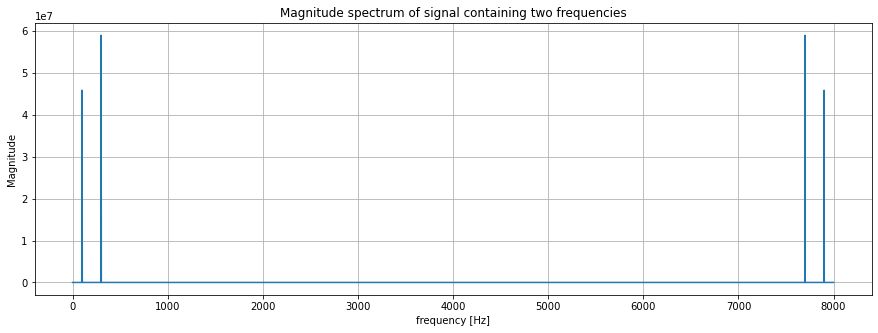

In [5]:
# graph result
figure2=plt.figure(figsize = (15,5))
plt.plot(frequencies, Yfreq_abs, linestyle = '-')
plt.xlabel("frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of signal containing two frequencies")
plt.grid()
#plt.xlim([0,2000])
plt.show()

Note that we see two vertical lines (high amplitudes) at the frequencies $f_1=100$ Hz and $f_2=300$ Hz. We also see the same lines again at $f_s-f_1$ and $f_s-f_2$, where $f_s=8000$ Hz denotes the sampling frequency that we applied. These frequencies are not really present but are artefacts of the Fast Fourier Transform (FFT). If you are majoring in electrical engineering or computer engineering, you will learn more about the FFT during your junior year. 

For now and this project, all you need to know is that the meaningful frequencies are in the range $[0, f_s/2] = [0, 4000 Hz]$ and you can ignore whatever happens outside of this range.

Thus, determining the frequencies is now an easy task: you just need to find the location of the large amplitudes in the magnitude spectrum, i.e. in variable `Yfreq_abs` in the example above.

### Tasks (10 points)

As described in the objective, your task is to determine the phone number (10 digits each) represented by each of the wav-files. The above Fast Fourier Transform approach may be used if you prefer it over your approach from Part 3. However, you first need to separate each of the digits first before you can use it. The digits are separated by short periods of silence.

The final product for this tasks contains of the Python program that accomplishes the task and an Excel or csv-file that contains the phone number associated with each sound file.

# NOTE:
#### The code is quite lengthy and runs 100 times, meaning that depending on the speed of your computer, it might take anywhere from 3 min to 10 min to run the code. It took me 5 min to run it on my laptop.

#### Please give it enough time to run through and only after 10 minutes, try running it again. (ps take a short break while the code runs)

#### The final result is in the form of a dataframe with the numbers in the form of a list, each digit seperated by a coma, 10 digits for each sound file

In [6]:
# Creating necessary list variables
file_name_list = []
signal_list = []
sr_list = []

# Creating a list of file names for easier reference
for i in range(100):
    file_name_list.append('sound{}'.format(i))
file_name_list = np.array(file_name_list)

# Appending the signal data to a list
for i in range(100):
    sr, data = wavfile.read("sound{}.wav".format(i))
    sr_list.append(sr)
    signal_list.append(data)

# Creating a dataframe of all lists
signal_table = list(zip(file_name_list,signal_list,sr_list))
signal_df = pd.DataFrame(data = signal_table, columns=['File_name', 'Signal_data', 'Sampling_rate'])
signal_df

,File_name,Signal_data,Sampling_rate
0,sound0,"[-13891, 9570, 16781, 13182, 3779, 3398, 11676...",8000
1,sound1,"[-8919, 5093, 11915, 10839, 1003, -5849, 908, ...",8000
2,sound2,"[7109, 2542, -2572, 2637, 13427, 20461, 10182,...",8000
3,sound3,"[1114, 374, 5391, 8241, 2320, -12038, -21991, ...",8000
4,sound4,"[-2092, -11938, -14865, -4132, 12168, 21394, 1...",8000
...,...,...,...
95,sound95,"[-2992, -12157, -18406, -7195, 12485, 26321, 2...",8000
96,sound96,"[-6030, 13405, 24833, 17345, 776, -4313, -4100...",8000
97,sound97,"[-6660, -9732, -270, 15216, 23224, 15102, -553...",8000
98,sound98,"[6526, 6411, 315, -2024, 7887, 17240, 13636, -...",8000


Enter Index Number (From 0 to 99) : 88


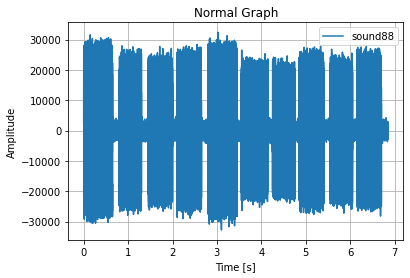

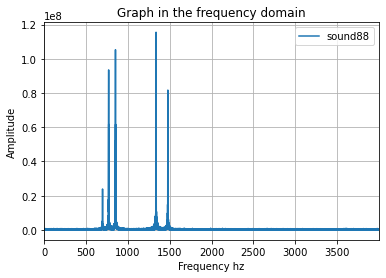

The Number is: [6, 8, 2, 5, 8, 6, 8, 8, 9, 6]


In [7]:
# Input an index number from 0 to 99 for testing and visualization purposes
# Running this code would ask for an input, enter the number of the sound file for which you want to visualize the data and get phone number
index = int(input('Enter Index Number (From 0 to 99) : '))

# Selecting all important information to later graph the audio file desired by the input
sr=8000
tn=np.arange(0, len(signal_df['Signal_data'][index])/sr, 1/sr)

x = np.fft.fft(signal_df['Signal_data'][index])
x_mag = abs(x)

fq = np.arange(0, sr, sr/len(signal_df['Signal_data'][index]))
if len(fq)==(len(signal_df['Signal_data'][index])):
    fq=fq
else:
    fq = np.arange(0, 7999.9999, sr/len(signal_df['Signal_data'][index]))

# Graphing the desired audio file
plt.plot(tn,signal_df['Signal_data'][index], label = "{}".format(signal_df['File_name'][index]))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Normal Graph")
plt.grid()
plt.legend()
plt.show()

plt.plot(fq, x_mag, label = "{}".format(signal_df['File_name'][index]))
plt.xlabel("Frequency hz")
plt.ylabel("Amplitude")
plt.title("Graph in the frequency domain")
plt.grid()
plt.legend()
plt.xlim([0, max(fq)/2])
plt.show()


# The entire code to determine the phone number

time_diff =int(sr*0.07) # Choosng a short interval of time (o.o7s) and corresponding it with its respective index number

sl = int(len(signal_df['Signal_data'][index])) #signal data length

#choosing all the values beyond the amplitude range of the noise
sg_indx = []
for i in range(sl): 
    if signal_df['Signal_data'][index][i]>8000 or signal_df['Signal_data'][index][i]<-8000:
        sg_indx.append(i)
    else:
        continue
sg_indx = np.array(sg_indx)
sg_indx_ln = len(sg_indx)

#Calculating the difference between the fetched index values
sg_indx_diff = []
for i in range(sg_indx_ln-1):
    d = sg_indx[i+1] - sg_indx[i]
    sg_indx_diff.append(d)
sg_indx_diff = np.array(sg_indx_diff)

# Fetching the index values where the difference is more than 0.07s
sg_indx_br = np.where(sg_indx_diff>time_diff)
sg_indx_br

#corresponding the fetched index values with the original index values  
sd_indx = []
for i in range(9):
    sd = sg_indx[sg_indx_br[0][i]]
    sd_indx.append(sd)
sd_indx = np.array(sd_indx)

frq_list = []

# Fast Fourier Transforming for all necessary signals per 1 audio file
if sd_indx[0]>4000:
    for r in range(1):
        fq = np.arange(0, 8000, int(8000/4000))
        x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-4000):sd_indx[r]]) # using fast fourier transform
        x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
        frq = []
        for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
            if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                frq.append(i)
        frq_list.append(fq[frq])
else:
    for r in range(1):
        fq = np.arange(0, 8000, int(8000/sd_indx[r]))
        x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-sd_indx[r]):sd_indx[r]]) # using fast fourier transform
        x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
        frq = []
        for i in range(int(sd_indx[r]/2)): # using r instead of 4000 due to a different sized list
            if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                frq.append(i)
        frq_list.append(fq[frq])

for r in range(8):
    fq = np.arange(0, 8000, int(8000/4000))
    r = r+1
    x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-4000):sd_indx[r]]) # using fast fourier transform
    x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
    frq = []
    for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
        if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
            frq.append(i)
    frq_list.append(fq[frq])

for i in range(1):
    fq = np.arange(0, 8000, int(8000/4000))
    x = np.fft.fft(signal_df['Signal_data'][index][(len(signal_df['Signal_data'][index])-4000):len(signal_df['Signal_data'][index])]) # using fast fourier transform
    x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
    frq = []
    for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
        if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
            frq.append(i)
    frq_list.append(fq[frq])

frq = []

# Creation of a list of the frequencies received
for i in range(10):
    frqq = []
    frqq.append(frq_list[i][0])
    frqq.append(frq_list[i][(len(frq_list[i])-1)])
    frq.append(frqq)
frq = np.array(frq)

# Checking the frequencies received and eliminating uncertainties
# This is done by setting a range of 10 Hz below and above the actual signal value
for i in range(10):
    if 687<frq[i][0]<707:
        frq[i][0]=697
    elif 760<frq[i][0]<780:
        frq[i][0]=770
    elif 842<frq[i][0]<862:
        frq[i][0]=852
    elif 931<frq[i][0]<951:
        frq[i][0]=941
    else:
        frq[i][0]=697

# Checking for error in columns
for i in range(10):
    if 1199<frq[i][1]<1219:
        frq[i][1]=1209
    elif 1326<frq[i][1]<1346:
        frq[i][1]=1336
    elif 1467<frq[i][1]<1487:
        frq[i][1]=1477
    else:
        frq[i][1]=1209

# Creation of a data base for all numbers and their corresponding frequencies
digit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 11]
f1 = [697, 697, 697, 770, 770, 770, 852, 852, 852, 941, 941, 941]
f2 = [1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]
digit_table = list(zip(digit,f1,f2))
digit_df = pd.DataFrame(data = digit_table, columns=['digit', 'f1', 'f2'])

# Selecting and printing the numbers
number = []
for i in range(10):
    digit_fft = int(digit_df[digit_df['f1']==frq[i][0]][digit_df[digit_df['f1']==frq[i][0]]['f2']==frq[i][1]]['digit'])
    number.append(digit_fft)
print('The Number is:', number)

### The following code will take time to run, approx 5 to 10 min. Please be patient (It works)(unless the kernell is killed, make sure it is running for 5-10 min)(cocalc might not work)

In [8]:
# Creating a list to store all phone numbers
number_100 = []

# The same code as above but repeats 100 times, 1 for each audio file 

for index in range(100):

    sl = int(len(signal_df['Signal_data'][index]))
    sg_indx = []
    for i in range(sl):
        if signal_df['Signal_data'][index][i]>8000 or signal_df['Signal_data'][index][i]<-8000:
            sg_indx.append(i)
        else:
            continue
    sg_indx = np.array(sg_indx)
    sg_indx_ln = len(sg_indx)

    sg_indx_diff = []
    for i in range(sg_indx_ln-1):
        d = sg_indx[i+1] - sg_indx[i]
        sg_indx_diff.append(d)
    sg_indx_diff = np.array(sg_indx_diff)

    sg_indx_br = np.where(sg_indx_diff>time_diff)
    sg_indx_br

    sd_indx = []
    for i in range(9):
        sd = sg_indx[sg_indx_br[0][i]]
        sd_indx.append(sd)
    sd_indx = np.array(sd_indx)

    frq_list = []

    # Fast Fourier Transforming for all necessary signals per 1 audio file
    if sd_indx[0]>4000:
        for r in range(1):
            fq = np.arange(0, 8000, int(8000/4000))
            x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-4000):sd_indx[r]]) # using fast fourier transform
            x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
            frq = []
            for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
                if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                    frq.append(i)
            frq_list.append(fq[frq])
    else:
        for r in range(1):
            fq = np.arange(0, 8000, int(8000/sd_indx[r]))
            x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-sd_indx[r]):sd_indx[r]]) # using fast fourier transform
            x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
            frq = []
            for i in range(int(sd_indx[r]/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
                if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                    frq.append(i)
            frq_list.append(fq[frq])

    for r in range(8):
        fq = np.arange(0, 8000, int(8000/4000))
        r = r+1
        x = np.fft.fft(signal_df['Signal_data'][index][(sd_indx[r]-4000):sd_indx[r]]) # using fast fourier transform
        x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
        frq = []
        for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
            if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                frq.append(i)
        frq_list.append(fq[frq])

    for i in range(1):
        fq = np.arange(0, 8000, int(8000/4000))
        x = np.fft.fft(signal_df['Signal_data'][index][(len(signal_df['Signal_data'][index])-4000):len(signal_df['Signal_data'][index])]) # using fast fourier transform
        x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
        frq = []
        for i in range(int(4000/2)): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
            if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
                frq.append(i)
        frq_list.append(fq[frq])

    frq = []

    # Creation of a list to group frequencies together
    for i in range(10):
        frqq = []
        frqq.append(frq_list[i][0])
        frqq.append(frq_list[i][(len(frq_list[i])-1)])
        frq.append(frqq)
    frq = np.array(frq)

    # Eliminating uncertainties in low frequencies
    for i in range(10):
        if 687<frq[i][0]<707:
            frq[i][0]=697
        elif 760<frq[i][0]<780:
            frq[i][0]=770
        elif 842<frq[i][0]<862:    
            frq[i][0]=852   
        elif 931<frq[i][0]<951:
            frq[i][0]=941
        else:
            frq[i][0]=697
    
    # Eliminating uncertainties in high frequencies
    for i in range(10):
        if 1199<frq[i][1]<1219:
            frq[i][1]=1209
        elif 1326<frq[i][1]<1346:
            frq[i][1]=1336
        elif 1467<frq[i][1]<1487:    
            frq[i][1]=1477   
        else:
            frq[i][1]=1209
    
    # Creating a dataframe of the numbers and their corresponding frequencies
    digit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 11]
    f1 = [697, 697, 697, 770, 770, 770, 852, 852, 852, 941, 941, 941]
    f2 = [1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]
    digit_table = list(zip(digit,f1,f2))
    digit_df = pd.DataFrame(data = digit_table, columns=['digit', 'f1', 'f2'])
    
    # Fetching the digit and apending all values to the list of 100 numbers
    number = []
    for i in range(10):
        digit_fft = int(digit_df[digit_df['f1']==frq[i][0]][digit_df[digit_df['f1']==frq[i][0]]['f2']==frq[i][1]]['digit'])
        number.append(digit_fft)
    number_100.append(number)

# Creating a dataframe of the numbers for their corresponding file name
signal_num = list(zip(file_name_list,number_100))
signal_num_df = pd.DataFrame(data = signal_num, columns=['File_name', 'Number'])
signal_num_df

,File_name,Number
0,sound0,"[3, 6, 5, 2, 5, 6, 2, 4, 5, 4]"
1,sound1,"[4, 1, 5, 5, 4, 3, 7, 2, 7, 8]"
2,sound2,"[3, 9, 6, 3, 1, 9, 6, 2, 7, 5]"
3,sound3,"[1, 0, 5, 5, 1, 6, 7, 6, 3, 2]"
4,sound4,"[0, 6, 2, 7, 9, 1, 2, 1, 0, 1]"
...,...,...
95,sound95,"[2, 4, 0, 3, 5, 0, 4, 4, 0, 9]"
96,sound96,"[5, 9, 1, 3, 6, 9, 8, 6, 0, 4]"
97,sound97,"[5, 3, 7, 0, 0, 2, 4, 9, 4, 9]"
98,sound98,"[6, 8, 8, 0, 0, 5, 1, 2, 7, 8]"


#### Exporting the dataframe to CSV to varify all numbers

In [9]:
#Exporting the dataframe to CSV to varify all numbers
signal_num_df.to_csv('signal_num_df.csv', index=False)